<a href="https://colab.research.google.com/github/khailadhlia/Multivariate-Statistics/blob/MANOVA/MANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 14.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

In [3]:
data_manova = pd.read_excel("/content/data MANOVA.xlsx")
data_manova

,Kecepatan,Waktu Tempuh,Jumlah Penumpang,Jenis Kendaraan
0,85,32,1,Bus
1,79,28,5,Motor
2,86,27,1,Bus
3,95,33,3,Bus
4,78,35,2,Bus
5,78,35,4,Bus
6,96,26,3,Mobil
7,88,28,1,Mobil
8,75,32,4,Bus
9,85,35,1,Motor


## Uji Normalitas Multivariat

In [4]:
data_Bus = data_manova.loc[data_manova['Jenis Kendaraan']=='Bus', ['Kecepatan', 'Waktu Tempuh', 'Jumlah Penumpang']]
data_Mobil = data_manova.loc[data_manova['Jenis Kendaraan']=='Mobil', ['Kecepatan', 'Waktu Tempuh', 'Jumlah Penumpang']]
data_Motor = data_manova.loc[data_manova['Jenis Kendaraan']=='Motor', ['Kecepatan', 'Waktu Tempuh', 'Jumlah Penumpang']]

In [5]:
print("uji normalitas multivariat Bus: ", pg.multivariate_normality(data_Bus, alpha=0.5))
print("uji normalitas multivariat Mobil: ", pg.multivariate_normality(data_Mobil, alpha=0.5))
print("uji normalitas multivariat Motor: ", pg.multivariate_normality(data_Motor, alpha=0.5))

uji normalitas multivariat Bus:  HZResults(hz=np.float64(11.170060229212064), pval=np.float64(2.460002294830503e-35), normal=False)
uji normalitas multivariat Mobil:  HZResults(hz=np.float64(9.818561406971455), pval=np.float64(2.8239913500488765e-32), normal=False)
uji normalitas multivariat Motor:  HZResults(hz=np.float64(7.830769851975174), pval=np.float64(1.9229466798162414e-27), normal=False)


Data tidak berdistribusi normal multivariat, sehingga kita perlu melakukan transformasi data

In [6]:
from sklearn.preprocessing import PowerTransformer

# Gabungkan semua data terlebih dahulu
data_all = data_manova[['Jenis Kendaraan', 'Kecepatan', 'Waktu Tempuh', 'Jumlah Penumpang']].copy()

# Terapkan transformasi Yeo-Johnson hanya pada kolom numerik
pt = PowerTransformer(method='yeo-johnson')
transformed = pt.fit_transform(data_all[['Kecepatan', 'Waktu Tempuh', 'Jumlah Penumpang']])

# Tambahkan hasil transformasi ke DataFrame
data_all[['Kecepatan_trans', 'Waktu_Tempuh_trans', 'Jumlah_Penumpang_trans']] = transformed

# Pisahkan kembali per jenis kendaraan
data_Bus_trans = data_all[data_all['Jenis Kendaraan'] == 'Bus'][['Kecepatan_trans', 'Waktu_Tempuh_trans', 'Jumlah_Penumpang_trans']]
data_Mobil_trans = data_all[data_all['Jenis Kendaraan'] == 'Mobil'][['Kecepatan_trans', 'Waktu_Tempuh_trans', 'Jumlah_Penumpang_trans']]
data_Motor_trans = data_all[data_all['Jenis Kendaraan'] == 'Motor'][['Kecepatan_trans', 'Waktu_Tempuh_trans', 'Jumlah_Penumpang_trans']]

Lalu lakukan lagi uji normalitas multivariatnya

In [7]:
print("uji normalitas multivariat Bus (trans):", pg.multivariate_normality(data_Bus_trans, alpha=0.05))
print("uji normalitas multivariat Mobil (trans):", pg.multivariate_normality(data_Mobil_trans, alpha=0.05))
print("uji normalitas multivariat Motor (trans):", pg.multivariate_normality(data_Motor_trans, alpha=0.05))

uji normalitas multivariat Bus (trans): HZResults(hz=np.float64(0.6799426642773733), pval=np.float64(0.19528768107545413), normal=True)
uji normalitas multivariat Mobil (trans): HZResults(hz=np.float64(0.5060973455709583), pval=np.float64(0.6042703626247953), normal=True)
uji normalitas multivariat Motor (trans): HZResults(hz=np.float64(0.7354894872496117), pval=np.float64(0.08387963511358254), normal=True)


Data berdistribusi normal multivariat

## Uji Homogenitas

In [8]:
#Gabungkan lagi datanya
data_trans_manova = pd.concat([data_Bus_trans, data_Mobil_trans, data_Motor_trans])
data_trans_manova['Jenis Kendaraan'] = data_manova['Jenis Kendaraan'].copy()
data_trans_manova

,Kecepatan_trans,Waktu_Tempuh_trans,Jumlah_Penumpang_trans,Jenis Kendaraan
0,0.795078,0.388206,-1.327564,Bus
2,0.896982,-0.762821,-1.327564,Bus
3,1.785296,0.640611,0.279634,Bus
4,0.061878,1.167588,-0.452694,Bus
5,0.061878,1.167588,0.921445,Bus
8,-0.263775,0.388206,0.921445,Bus
11,-0.263775,-0.324628,-0.452694,Bus
15,-0.373964,1.724092,0.279634,Bus
16,-0.823378,-0.094418,-1.327564,Bus
19,-1.287591,-0.762821,-1.327564,Bus


In [9]:
pg.box_m(data_trans_manova, dvs=['Kecepatan_trans', 'Waktu_Tempuh_trans', 'Jumlah_Penumpang_trans'], group='Jenis Kendaraan')

,Chi2,df,pval,equal_cov
box,8.657308,12.0,0.731889,True


Data sudah Homogen

## MANOVA

In [10]:
manova_model = MANOVA.from_formula('Kecepatan_trans + Waktu_Tempuh_trans + Jumlah_Penumpang_trans ~ Jenis_Kendaraan', data=data_trans_manova.rename(columns={'Jenis Kendaraan': 'Jenis_Kendaraan'}))
manova_results = manova_model.mv_test()
print(manova_results)

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9800 3.0000 45.0000  0.3055 0.8213
         Pillai's trace 0.0200 3.0000 45.0000  0.3055 0.8213
 Hotelling-Lawley trace 0.0204 3.0000 45.0000  0.3055 0.8213
    Roy's greatest root 0.0204 3.0000 45.0000  0.3055 0.8213
------------------------------------------------------------
                                                            
------------------------------------------------------------
    Jenis_Kendaraan     Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9442 6.0000 90.0000  0.4372 0.8522
         Pillai's trace 0.0564 6.0000 92.0000  0.4452 0.8466
 Hotelling-Lawley trace 0.0585 6.0000 58.2

In [11]:
print(data_manova.columns)

Index(['Kecepatan', 'Waktu Tempuh', 'Jumlah Penumpang', 'Jenis Kendaraan'], dtype='object')


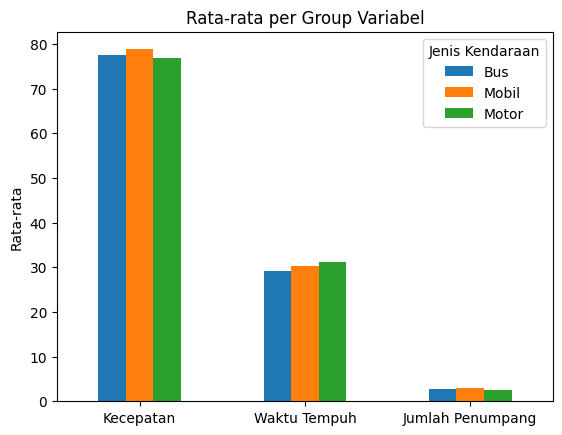

In [12]:
data_manova.groupby('Jenis Kendaraan')[['Kecepatan', 'Waktu Tempuh', 'Jumlah Penumpang']].mean().T.plot(kind='bar')
plt.title('Rata-rata per Group Variabel')
plt.ylabel('Rata-rata')
plt.xticks(rotation=0)
plt.show()

Berdasarkan analisis MANOVA, tidak ditemukan perbedaan yang signifikan secara statistik dalam kombinasi rata-rata kecepatan, waktu tempuh, dan jumlah penumpang antar jenis kendaraan (Bus, Mobil, dan Motor). Asumsi normalitas dan homogenitas sudah terpenuhi setelah transformasi data, namun hasil analisis menunjukkan bahwa jenis kendaraan tidak memberikan pengaruh yang berarti terhadap ketiga variabel tersebut secara simultan.